<a href="https://colab.research.google.com/github/sauravsingla/General/blob/master/Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy.integrate import simps
import pandas as pd
import datetime as dt


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl


pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2


from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler



In [ ]:
data = pd.read_csv('dataset_Facebook.csv', delimiter=';')
data.head(4)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777


In [ ]:
data.to_csv('updated_dataset_Facebook.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

In [ ]:
data.shape

(500, 19)

In [ ]:
display(data.describe())

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [ ]:
for attr in data.columns.values.tolist()[0:]:
  print("Unique values in "+attr+":")
  print(np.unique(data[attr]).tolist())

Unique values in Page total likes:
[81370, 85093, 85979, 86491, 86909, 91009, 91116, 91223, 91330, 91437, 91544, 91651, 91758, 91865, 91972, 92079, 92186, 92293, 92400, 92507, 92614, 92721, 92828, 92935, 93042, 93149, 93256, 93363, 93470, 93577, 93684, 96749, 98195, 100732, 102112, 104070, 106928, 107907, 109670, 111620, 113028, 115368, 115893, 116091, 116435, 117764, 119198, 120050, 121540, 123047, 124940, 125612, 126141, 126345, 126424, 127082, 128032, 129600, 130791, 131300, 131630, 131728, 131808, 131956, 132201, 132817, 133451, 133594, 133679, 134879, 135195, 135428, 135617, 135700, 135713, 136013, 136393, 136642, 136736, 137020, 137059, 137177, 137893, 138185, 138329, 138353, 138414, 138458, 138895, 139441]
Unique values in Type:
['Link', 'Photo', 'Status', 'Video']
Unique values in Category:
[1, 2, 3]
Unique values in Post Month:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Unique values in Post Weekday:
[1, 2, 3, 4, 5, 6, 7]
Unique values in Post Hour:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

In [ ]:
data['Type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [ ]:
data['Post Month'].value_counts()

10    60
7     52
12    50
4     50
6     49
11    45
5     37
9     36
3     36
8     34
2     26
1     25
Name: Post Month, dtype: int64

In [ ]:
data['Paid'].value_counts()
data['like'].fillna(0,inplace=True)
data['share'].fillna(0,inplace=True)
data['Paid'].fillna(0,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   500 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

count       500.000000
mean     123194.176000
std       16272.813214
min       81370.000000
25%      112676.000000
50%      129600.000000
75%      136393.000000
max      139441.000000
Name: Page total likes, dtype: float64
0.0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


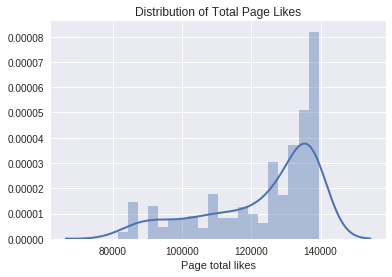

In [ ]:
sns.distplot(data['Page total likes'],bins=20)
plt.title("Distribution of Total Page Likes")
print(data['Page total likes'].describe())
print(sum(data['Page total likes'] == 0)/float(len(data)))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


count    500.000000
mean       7.038000
std        3.307936
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: Post Month, dtype: float64
0.0


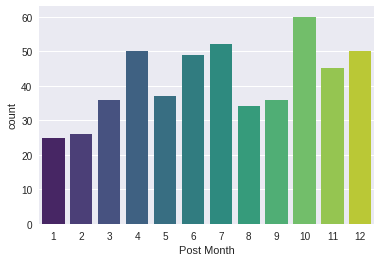

In [ ]:
sns.countplot(data['Post Month'],palette='viridis')
print(data['Post Month'].describe())
print(sum(data['Post Month'] == 0)/float(len(data)))

count    500.000000
mean       1.880000
std        0.852675
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Category, dtype: float64
0.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


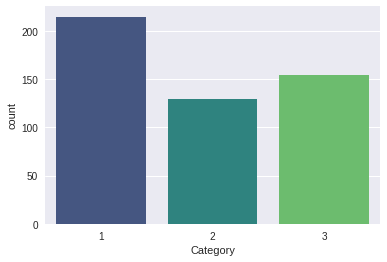

In [ ]:
sns.countplot(data['Category'],palette='viridis')
print(data['Category'].describe())
print(sum(data['Category'] == 0)/float(len(data)))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Frequency of Posts by Weekday')

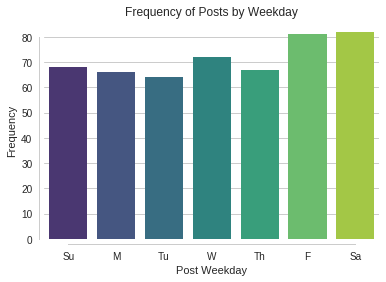

In [ ]:
from collections import OrderedDict
sns.set_style("whitegrid")

f, ax = plt.subplots()
sns.countplot(data['Post Weekday'],palette='viridis')
handles = ["Su", "M", "Tu", "W", "Th", "F",'Sa']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
ax.set_ylabel("Frequency")
sns.despine(offset = 5, trim = True)
plt.title("Frequency of Posts by Weekday")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Frequency of Posts by Hour')

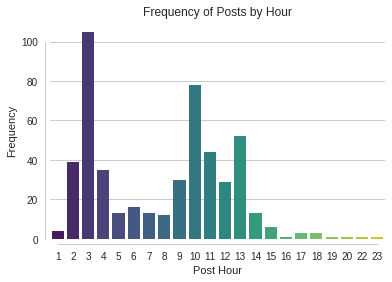

In [ ]:
sns.set_style("whitegrid")

f, ax = plt.subplots()
sns.countplot(data['Post Hour'],palette='viridis',)
#handles = ["Su", "M", "Tu", "W", "Th", "F",'Sa']
#labels = [0,1,2,3,4,5,6]
#plt.xticks(labels, handles)
ax.set_ylabel("Frequency")
sns.despine(offset = 5, trim = True)
plt.title("Frequency of Posts by Hour")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0, 0.5, '# of Likes')

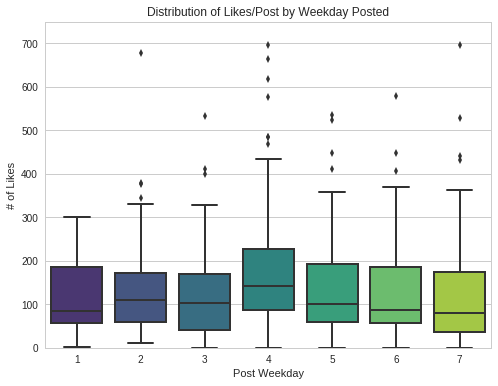

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Weekday',y='like',data=data,palette='viridis')
plt.ylim(0,750)
plt.title("Distribution of Likes/Post by Weekday Posted")
plt.ylabel("# of Likes")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


count    500.000000
mean       0.278000
std        0.448462
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Paid, dtype: float64
0.722


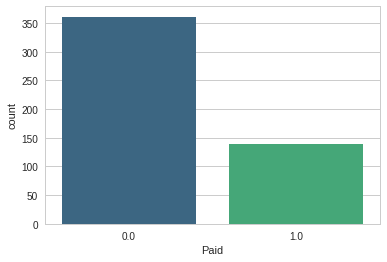

In [ ]:
sns.countplot(data['Paid'],palette='viridis')
print(data['Paid'].describe())
print(sum(data['Paid'] == 0)/float(len(data)))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


Text(0, 0.5, '# of Likes')

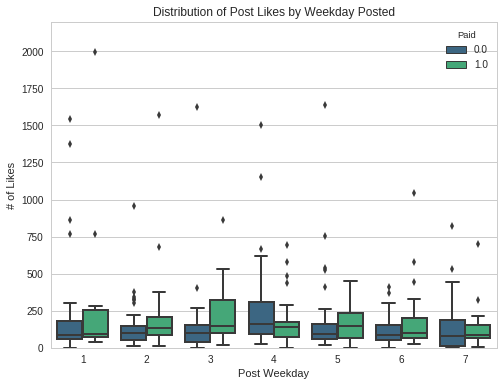

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Weekday',y='like',hue='Paid',data=data,palette='viridis')
plt.ylim(0,2200)
plt.title("Distribution of Post Likes by Weekday Posted")
plt.ylabel("# of Likes")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 1.0, 'Distribution of Total Interactions by Weekday Posted')

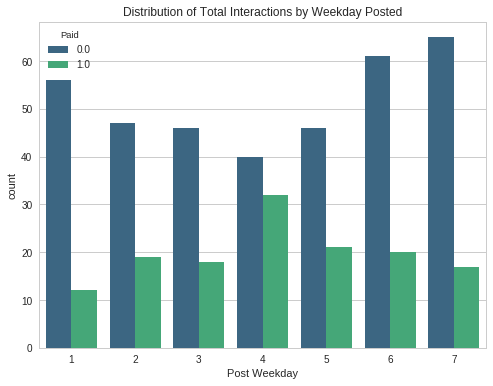

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Post Weekday',hue='Paid',data=data,palette='viridis')
plt.title("Distribution of Total Interactions by Weekday Posted")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0, 0.5, '# of Likes')

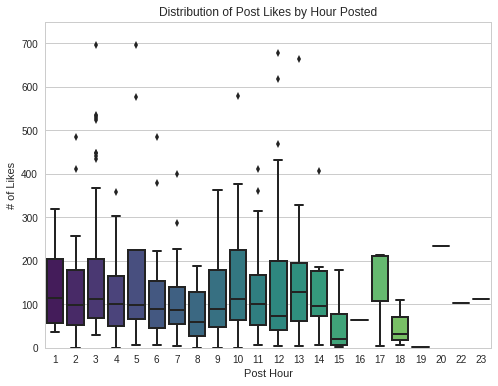

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Hour',y='like',data=data,palette='viridis')
plt.ylim(0,750)
plt.title("Distribution of Post Likes by Hour Posted")
plt.ylabel("# of Likes")


Text(0, 0.5, '# of Likes')

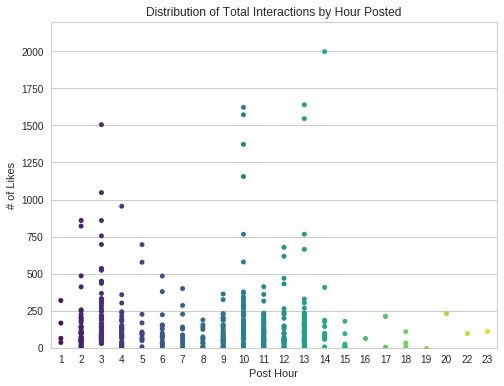

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Post Hour',y='like',data=data,palette='viridis')
plt.ylim(0,2200)
plt.title("Distribution of Total Interactions by Hour Posted")
plt.ylabel("# of Likes")

Text(0.5, 1.0, '# Page Likes vs. # Post Likes')

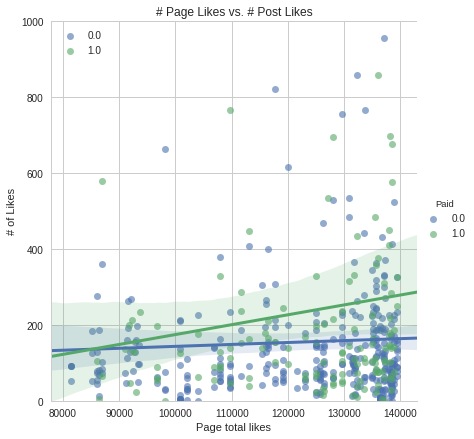

In [ ]:
sns.lmplot(x='Page total likes',y='like',
           hue='Paid',data=data,fit_reg=True,
          scatter_kws={'alpha':0.6},size=(6))
plt.legend()
plt.ylim(0,1000)
plt.ylabel("# of Likes")
plt.title('# Page Likes vs. # Post Likes')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Number of Likes vs. Post Category')

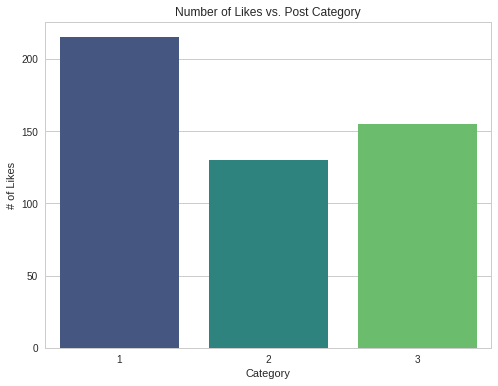

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Category',data=data,palette='viridis')
plt.ylabel("# of Likes")
plt.title("Number of Likes vs. Post Category")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


Text(0, 0.5, '# of likes')

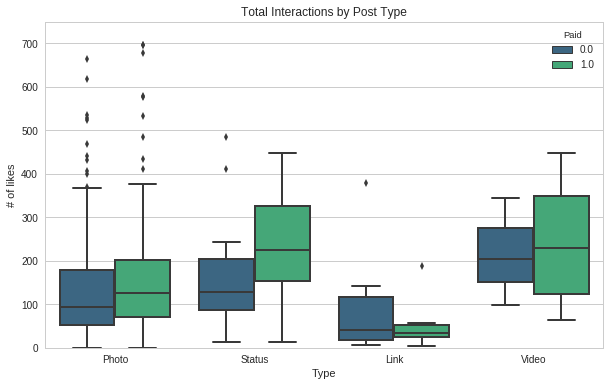

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type',y='like',hue='Paid',data=data,palette='viridis')
plt.ylim(0,750)
#sns.despine(offset=4,bottom=True)
plt.title("Total Interactions by Post Type")
plt.ylabel("# of likes")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0, 0.5, 'Frequency')

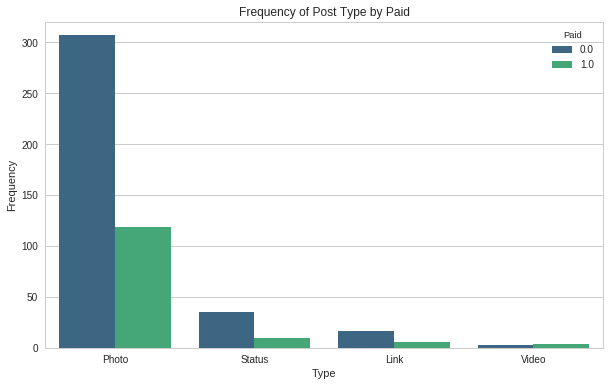

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type',hue='Paid',data=data,palette='viridis')
plt.ylim(0,320)
#sns.despine(offset=4,bottom=True)
plt.title("Frequency of Post Type by Paid")
plt.ylabel("Frequency")


In [ ]:
timePivot = pd.pivot_table(data,aggfunc='median',
                           columns='Post Hour',
                           index='Post Weekday',
                           values='like')
timePivot = timePivot[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

Text(0.5, 1.0, 'Median Likes Per Post by Post Weekday and Hour')

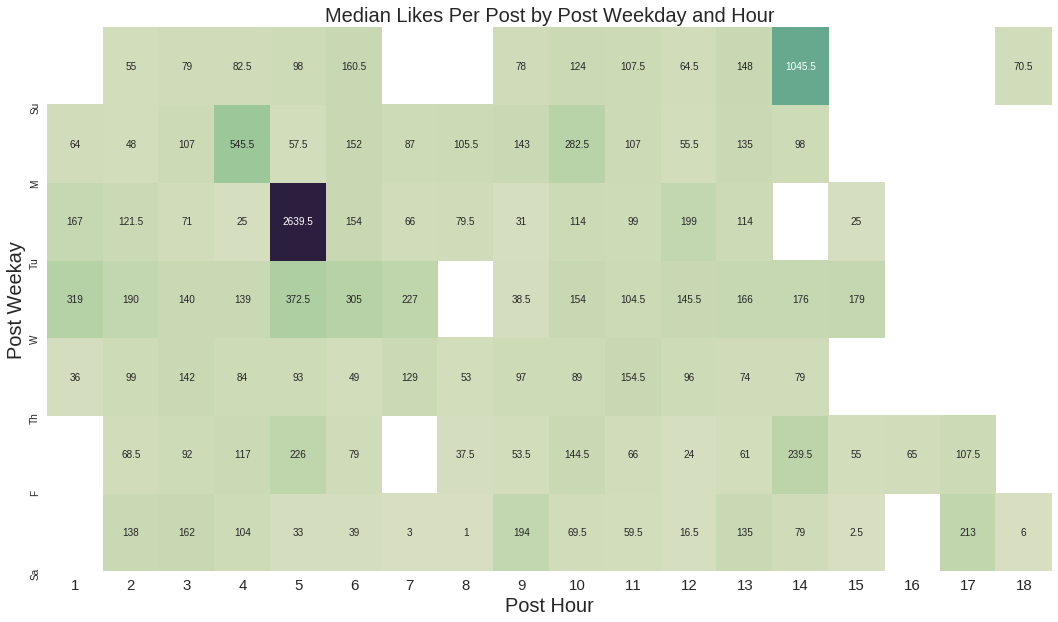

In [ ]:
plt.figure(figsize=(18,10))
cmap= sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
sns.heatmap(timePivot,cbar=False,cmap=cmap,annot=True, fmt='g')
#plt.pcolor(lnch_pivot,cmap=plt.cm.Blues, alpha=0.8)
plt.yticks(np.arange(7),['Sa','F','Th','W','Tu','M','Su'],fontsize=10)
plt.xticks(fontsize=15)
plt.ylabel('Post Weekay',fontsize=20)
plt.xlabel('Post Hour',fontsize=20)
plt.title('Median Likes Per Post by Post Weekday and Hour',fontsize=20)


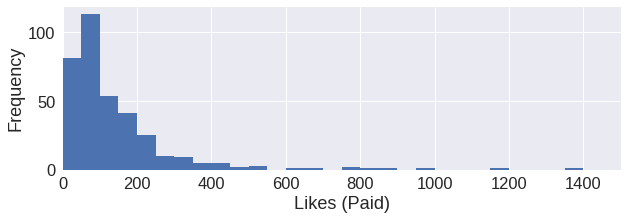

sample_size: 361
sample_mean: 155.23545706371192
sample_variance: 48213.102739304406


In [ ]:
unpaid_likes = data[data['Paid']==0]['like']
unpaid_likes = unpaid_likes.dropna()
sns.set(font_scale=1.65)
fig = plt.figure(figsize=(10,3))
ax=unpaid_likes.hist(range=(0, 1500),bins=30)
ax.set_xlim(0,1500)

plt.xlabel('Likes (Paid)')
plt.ylabel('Frequency')
plt.show()

print('sample_size: {}'.format(unpaid_likes.shape[0]))
print('sample_mean: {}'.format(unpaid_likes.mean()))
print('sample_variance: {}'.format(unpaid_likes.var()))

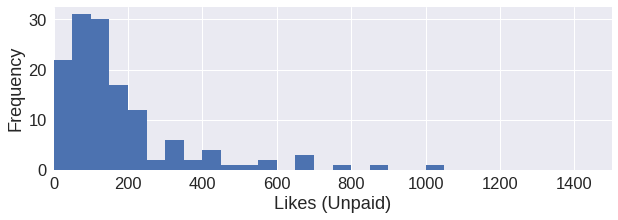

sample_size: 139
sample_mean: 235.6474820143885
sample_variance: 247175.07048274425


In [ ]:
paid_likes = data[data['Paid']==1]['like']
fig = plt.figure(figsize=(10,3))
ax=paid_likes.hist(range=(0, 1500),bins=30)
ax.set_xlim(0,1500)

plt.xlabel('Likes (Unpaid)')
plt.ylabel('Frequency')
plt.show()

print('sample_size: {}'.format(paid_likes.shape[0]))
print('sample_mean: {}'.format(paid_likes.mean()))
print('sample_variance: {}'.format(paid_likes.var()))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


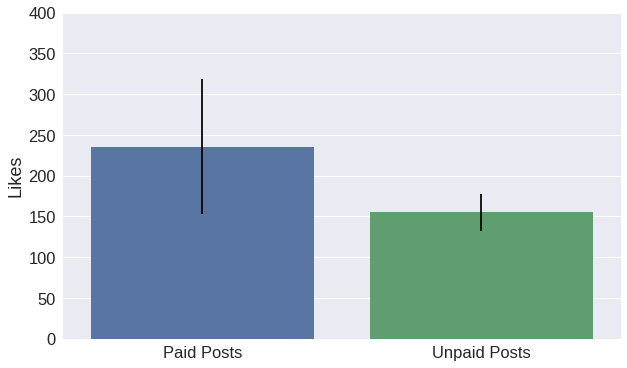

In [ ]:
paid_err = 1.96*(paid_likes.std())/(np.sqrt(paid_likes.shape[0]))
unpaid_err = 1.96*(unpaid_likes.std())/(np.sqrt(unpaid_likes.shape[0]))

x = ['Paid Posts', 'Unpaid Posts']
y = [paid_likes.mean(), unpaid_likes.mean()]
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=x, y=y, yerr=[paid_err, unpaid_err])
ax.set_ylim(0, 400)
plt.ylabel('Likes')
plt.show()

In [ ]:
data.drop(data.columns[7:15], axis=1,inplace=True)

No handles with labels found to put in legend.


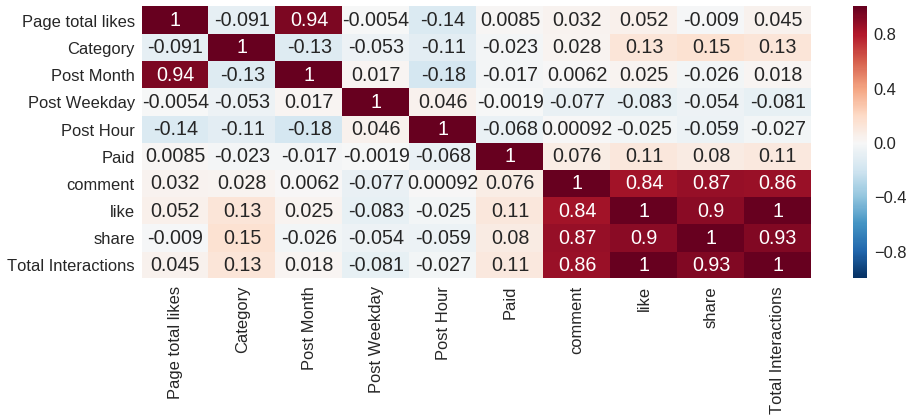

In [ ]:
# Display the correlation heatmap
corr = data.corr()
plt.figure(figsize = (15,5))
ax = sns.heatmap(corr, annot=True)
ax.legend(loc=0, prop={'size': 2})

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest

In [ ]:
data = pd.read_csv('dataset_Facebook.csv', delimiter=';')


In [ ]:
data['Paid'].value_counts()
data['like'].fillna(0,inplace=True)
data['share'].fillna(0,inplace=True)
data['Paid'].fillna(0,inplace=True)

In [ ]:
for attr in data.columns.values.tolist()[0:]:
  print("Unique values in "+attr+":")
  print(np.unique(data[attr]).tolist())

Unique values in Page total likes:
[81370, 85093, 85979, 86491, 86909, 91009, 91116, 91223, 91330, 91437, 91544, 91651, 91758, 91865, 91972, 92079, 92186, 92293, 92400, 92507, 92614, 92721, 92828, 92935, 93042, 93149, 93256, 93363, 93470, 93577, 93684, 96749, 98195, 100732, 102112, 104070, 106928, 107907, 109670, 111620, 113028, 115368, 115893, 116091, 116435, 117764, 119198, 120050, 121540, 123047, 124940, 125612, 126141, 126345, 126424, 127082, 128032, 129600, 130791, 131300, 131630, 131728, 131808, 131956, 132201, 132817, 133451, 133594, 133679, 134879, 135195, 135428, 135617, 135700, 135713, 136013, 136393, 136642, 136736, 137020, 137059, 137177, 137893, 138185, 138329, 138353, 138414, 138458, 138895, 139441]
Unique values in Type:
['Link', 'Photo', 'Status', 'Video']
Unique values in Category:
[1, 2, 3]
Unique values in Post Month:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Unique values in Post Weekday:
[1, 2, 3, 4, 5, 6, 7]
Unique values in Post Hour:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

In [ ]:
outlierCut = np.percentile(data['like'],90)
outlierCut

330.1

In [ ]:
data = data[data['like']<outlierCut]

In [ ]:
def Weekday(x):
    if x == 1:
        return 'Su'
    elif x== 2:
        return 'Mo'
    elif x == 3:
        return 'Tu'
    elif x == 4:
        return 'We'
    elif x == 5:
        return 'Th'
    elif x ==6:
        return 'Fr'
    elif x == 7:
        return "Sa"

data['Weekday'] = data['Post Weekday'].apply(lambda x: Weekday(x))

In [ ]:
dayDf = pd.get_dummies(data['Weekday'])

In [ ]:
data = pd.concat([data,dayDf],axis=1)

In [ ]:
hours = list(range(0,18))
#hours
for i in hours:
    hours[i] = str(hours[i])
    hours[i]='hr_'+ hours[i]
    #print str(hours[i])

In [ ]:
hourDf = pd.get_dummies(data['Post Hour'],prefix='hr_')
data = pd.concat([data,hourDf],axis=1)
monthDf = pd.get_dummies(data['Post Month'],prefix='Mo')
data = pd.concat([data,monthDf],axis=1)
data['Video'] = pd.get_dummies(data['Type'])['Video']
data['Status'] = pd.get_dummies(data['Type'])['Status']
data['Photo'] = pd.get_dummies(data['Type'])['Photo']
data['Cat_1'] = pd.get_dummies(data['Category'])[1]
data['Cat_2'] = pd.get_dummies(data['Category'])[2]


In [ ]:

data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Weekday,Fr,Mo,Sa,Su,Th,...,hr__15,hr__16,hr__17,hr__18,hr__19,hr__20,hr__22,hr__23,Mo_1,Mo_2,Mo_3,Mo_4,Mo_5,Mo_6,Mo_7,Mo_8,Mo_9,Mo_10,Mo_11,Mo_12,Video,Status,Photo,Cat_1,Cat_2
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,We,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,Tu,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,Tu,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,Mo,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186,Su,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [ ]:
x = data[['Page total likes','Paid','Video','Status','Photo',
    'Cat_1','Cat_2','Mo','Tu','Sa',"We",'Th','Fr',
       'hr__17','hr__1','hr__2','hr__3','hr__4','hr__5', 'hr__6','hr__7','hr__8',
        'hr__9','hr__10','hr__11','hr__12','hr__13','hr__14','hr__15','hr__16','Mo_1',
       'Mo_2','Mo_12','Mo_4','Mo_5','Mo_6','Mo_7','Mo_8','Mo_9','Mo_11','Mo_10']]
y = data['Total Interactions']

In [ ]:

x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.1,
                                                  random_state=42)

In [ ]:
y_test.count()

45

In [ ]:
x_test.columns

Index(['Page total likes', 'Paid', 'Video', 'Status', 'Photo', 'Cat_1',
       'Cat_2', 'Mo', 'Tu', 'Sa', 'We', 'Th', 'Fr', 'hr__17', 'hr__1', 'hr__2',
       'hr__3', 'hr__4', 'hr__5', 'hr__6', 'hr__7', 'hr__8', 'hr__9', 'hr__10',
       'hr__11', 'hr__12', 'hr__13', 'hr__14', 'hr__15', 'hr__16', 'Mo_1',
       'Mo_2', 'Mo_12', 'Mo_4', 'Mo_5', 'Mo_6', 'Mo_7', 'Mo_8', 'Mo_9',
       'Mo_11', 'Mo_10'],
      dtype='object')

In [ ]:
reg = linear_model.LinearRegression(normalize=True)
lasso = linear_model.Lasso(normalize=True)
reg.fit(x_train,y_train)
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
reg.coef_

array([ 6.88696089e-03,  1.18091461e+01,  1.31327991e+02,  7.46400495e+01,
        3.59053197e+01, -5.02819786e+01, -1.77362313e+01,  6.18762265e-01,
       -3.49520065e+00, -1.71012797e+00,  4.10109769e+01,  1.38506788e+01,
        1.39747700e+01,  8.84621310e+01,  4.57016239e+01, -6.34197423e+00,
        1.36706333e+01,  6.05586248e+00,  7.61091406e+00, -1.71706314e+01,
       -7.98758446e+00, -2.26107368e+01,  8.19424516e-01,  1.76718075e+01,
        3.14777138e+00, -2.04208043e+01,  2.05359203e+01, -1.22084344e+01,
       -3.96543813e+01, -9.25362168e+01,  1.35544051e+02,  1.34423441e+02,
       -2.47654046e+02, -3.70949069e+01, -6.96275330e+01, -1.55218755e+02,
       -1.65678726e+02, -2.13547323e+02, -1.78841980e+02, -2.14750881e+02,
       -2.33982237e+02])

In [ ]:

lasso.coef_

array([  0.        ,   0.        ,   0.        ,   0.        ,
        -0.        , -10.67184397,   0.        ,  -0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
        -0.        ])

In [ ]:
pred = reg.predict(x_test)
pred_train = reg.predict(x_train)

lpred = lasso.predict(x_test)
lpred_train = lasso.predict(x_train)

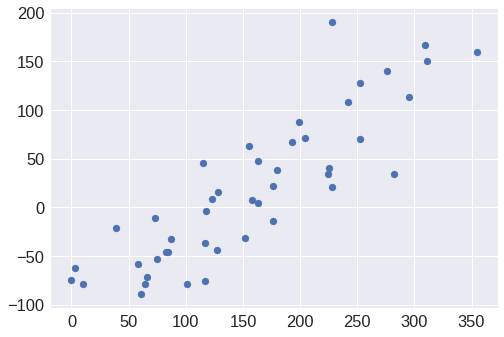

In [ ]:
LRerror = y_test - pred
plt.scatter(y_test, LRerror)
#plt.ylim(-400,400)
#plt.xlim(0,450)

(0, 450)

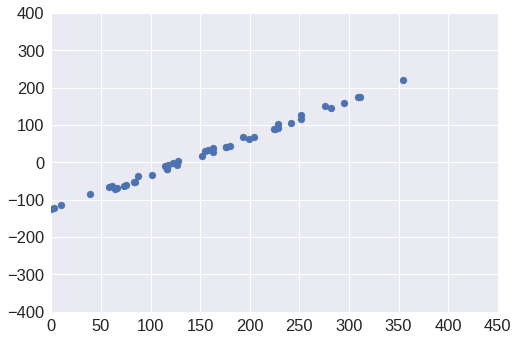

In [ ]:
LSerror = y_test - lpred
plt.scatter(y_test, LSerror)
plt.ylim(-400,400)
plt.xlim(0,450)

In [ ]:
testScore = r2_score(y_pred=pred,y_true=y_test)
trainScore = r2_score(y_pred=pred_train,y_true=y_train)

ltestScore = r2_score(y_pred=lpred,y_true=y_test)
ltrainScore = r2_score(y_pred=lpred_train,y_true=y_train)

In [ ]:
lrResults = pd.DataFrame()
lrResults['Score'] = [trainScore,testScore]
lrResults['Step'] = ['train','test']

lrResults

,Score,Step
0,0.225103,train
1,0.214642,test


In [ ]:
lassoResults = pd.DataFrame()
lassoResults['Score'] = [ltrainScore,ltestScore]
lassoResults['Step'] = ['train','test']

lassoResults

,Score,Step
0,0.028822,train
1,-0.046579,test


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'R^2 Scores')

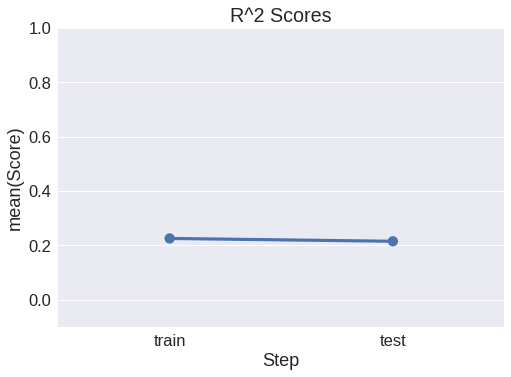

In [ ]:
sns.pointplot(y=lrResults['Score'],x=lrResults['Step'])
plt.ylim([-.1,1])
plt.title('R^2 Scores')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500,min_samples_split=10)
rf.fit(x_train,y_train)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(x_train)
predicted_test = rf.predict(x_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print("Test data R-2 score: {}".format(test_score))
print("Test data Spearman correlation: {}".format(spearman[0]))
print("Test data Pearson correlation: {}".format(pearson[0]))

Test data R-2 score: -0.004704344860006149
Test data Spearman correlation: 0.2637456797433316
Test data Pearson correlation: 0.2753723076995445


In [ ]:
train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print("Train data R-2 score: {}".format(train_score))
print("Train data Spearman correlation: {}".format(spearmanTrain[0]))
print("Train data Pearson correlation: {}".format(pearsonTrain[0]))

 
Train data R-2 score: 0.6036014403691878
Train data Spearman correlation: 0.8434703577788362
Train data Pearson correlation: 0.8154562028747553


In [ ]:
RFperf = pd.DataFrame()
RFperf['Score'] = [train_score,test_score]
RFperf['Step'] = ['train','test']
RFperf

,Score,Step
0,0.603601,train
1,-0.004704,test


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


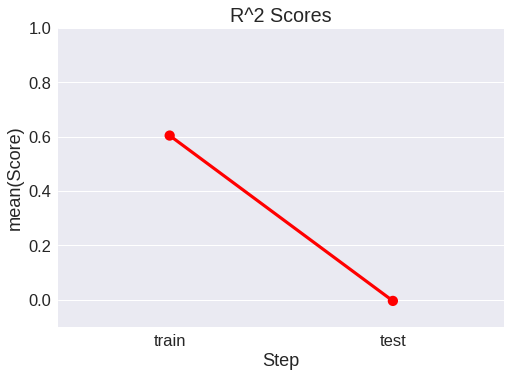

In [ ]:
sns.pointplot(y=RFperf['Score'],x=RFperf['Step'],color='Red')
plt.ylim([-.1,1])
plt.title('R^2 Scores')
plt.savefig('RFScores.png',bbox_inches='tight')

In [ ]:
predicted_test = rf.predict(x_test)

fI = pd.DataFrame()
fI['Variable'] = list(x_train.columns)
fI['Importance'] = rf.feature_importances_
fI.sort_values(by='Importance',ascending=False)[0:15]

,Variable,Importance
0,Page total likes,0.193093
5,Cat_1,0.121230
1,Paid,0.055972
10,We,0.046954
40,Mo_10,0.046190
9,Sa,0.037328
36,Mo_7,0.032831
26,hr__13,0.032268
23,hr__10,0.028633
34,Mo_5,0.026796


In [ ]:
topVars= list(fI.sort_values(by='Importance',ascending=False)[0:15]['Variable'])
topVars

['Page total likes',
 'Cat_1',
 'Paid',
 'We',
 'Mo_10',
 'Sa',
 'Mo_7',
 'hr__13',
 'hr__10',
 'Mo_5',
 'Mo_2',
 'Fr',
 'Mo_11',
 'hr__4',
 'Tu']

In [ ]:
x = data[topVars]
x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.3,
                                                  random_state=50)

In [ ]:
rf = RandomForestRegressor(n_estimators=500,min_samples_split=15)
rf.fit(x_train,y_train)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=15, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(x_train)
predicted_test = rf.predict(x_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)


print("Test data R-2 score: {}".format(test_score))
print("Test data Spearman correlation: {}".format(spearman[0]))
print("Test data Pearson correlation: {}".format(pearson[0]))

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print("Train data R-2 score: {}".format(train_score))
print("Train data Spearman correlation: {}".format(spearmanTrain[0]))
print("Train data Pearson correlation: {}".format(pearsonTrain[0]))

Test data R-2 score: 0.14855688870124362
Test data Spearman correlation: 0.4618690372512185
Test data Pearson correlation: 0.39429661028721824
 
Train data R-2 score: 0.44422685564016606
Train data Spearman correlation: 0.7151420062381756
Train data Pearson correlation: 0.6935730527303576


In [ ]:
! apt-get install default-jre
!java -version
! pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.10-63ubuntu1~02).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
openjdk version "10.0.2" 2018-07-17
OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4)
OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)
    100% |████████████████████████████████| 120.9MB 184kB/s 
  Running setup.py bdist_wheel for h2o ... - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/18/21/61/70df74d01217493f8eeb0bc2f65a25d341ae4f2d412eb29ad6
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,6 mins 28 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_unknownUser_eble0n
H2O cluster total nodes:,1
H2O cluster free memory:,2.937 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


In [ ]:
df = h2o.import_file('updated_dataset_Facebook.csv')


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
df = df.fillna(method="forward",axis=0,maxlen=1)
df

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20
0,139441,1,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
1,139441,2,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
2,139441,1,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
3,139441,1,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
4,139441,1,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
5,139441,2,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186
6,139441,1,3,12,1,3,1,11692,19479,481,265,364,15432,9328,379,3,249,27,279
7,139441,1,3,12,7,9,1,13720,24137,537,232,305,19728,11056,422,0,325,14,339
8,139441,2,2,12,7,3,0,11844,22538,1530,1407,1692,15220,7912,1250,0,161,31,192
9,139441,1,3,12,6,10,0,4694,8668,280,183,250,4309,2324,199,3,113,26,142


In [ ]:
df=df[:,["Page total likes",	"Type",	"Category", "Post Month",	"Post Weekday",	"Post Hour", "Paid","like"]]
df

Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,like
139441,Photo,2,12,4,3,0,79
139441,Status,2,12,3,10,0,130
139441,Photo,3,12,3,3,0,66
139441,Photo,2,12,2,10,1,1572
139441,Photo,2,12,2,3,0,325
139441,Status,2,12,1,9,0,152
139441,Photo,3,12,1,3,1,249
139441,Photo,3,12,7,9,1,325
139441,Status,2,12,7,3,0,161
139441,Photo,3,12,6,10,0,113


In [ ]:
train, test = df.split_frame(ratios=[.9])
# Identify predictors and response
x = train.columns
y = "like"
x.remove(y)

In [ ]:
# Run AutoML 
aml = H2OAutoML(max_runtime_secs = 60)
aml.train(x = x, y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_4_AutoML_20190125_124135


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 68309.09808546996
RMSE: 261.36009275608615
MAE: 107.38519278594426
RMSLE: 0.9906932047689141
Mean Residual Deviance: 68309.09808546996

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 103198.00742369633
RMSE: 321.2444667596569
MAE: 135.9415930719753
RMSLE: 1.1762891964639135
Mean Residual Deviance: 103198.00742369633
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,135.89345,14.647488,173.25166,136.22644,136.52402,119.4769740,113.98811
mean_residual_deviance,102926.2660000,77791.54,320166.2,60948.645,73033.984,37317.875,23164.646
mse,102926.2660000,77791.54,320166.2,60948.645,73033.984,37317.875,23164.646
r2,-0.1356223,0.1544659,-0.0037466,-0.0668243,-0.0648670,0.0241540,-0.5668275
residual_deviance,102926.2660000,77791.54,320166.2,60948.645,73033.984,37317.875,23164.646
rmse,285.66718,103.24859,565.8323,246.87779,270.24802,193.17834,152.19936
rmsle,1.1756177,0.0242150,1.2078621,1.1202377,1.2085143,1.1884458,1.1530287


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2019-01-25 12:41:47,0.641 sec,0.0,317.1934833,135.7248585,100611.7058703
,2019-01-25 12:41:47,0.663 sec,5.0,300.5927843,125.8850264,90356.0219504
,2019-01-25 12:41:47,0.678 sec,10.0,292.9814815,118.3621194,85838.1484905
,2019-01-25 12:41:47,0.696 sec,15.0,283.2678499,115.6616782,80240.6748041
,2019-01-25 12:41:47,0.711 sec,20.0,274.9997201,113.3210328,75624.8460610
,2019-01-25 12:41:47,0.725 sec,25.0,268.4415059,110.1114654,72060.8421065
,2019-01-25 12:41:47,0.740 sec,30.0,261.3600928,107.3851928,68309.0980855


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Page total likes,28888268.0000000,1.0,0.3448416
Post Hour,23287964.0000000,0.8061392,0.2779903
Post Weekday,13953418.0000000,0.4830133,0.1665631
Category,6963440.0,0.2410473,0.0831232
Post Month,5401339.5,0.1869735,0.0644762
Paid,4780639.0,0.1654872,0.0570669
Type,497497.8125000,0.0172214,0.0059387


In [ ]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_4_AutoML_20190125_124135,125463,354.207,125463,186.708,1.52622
GBM_3_AutoML_20190125_124135,127945,357.694,127945,182.926,1.4761
StackedEnsemble_AllModels_AutoML_20190125_124135,128148,357.977,128148,188.124,1.6464
StackedEnsemble_BestOfFamily_AutoML_20190125_124135,128447,358.395,128447,189.669,1.6722
DeepLearning_grid_1_AutoML_20190125_124135_model_2,130208,360.843,130208,179.042,1.60358
GBM_2_AutoML_20190125_124135,130526,361.284,130526,191.391,1.52148
GBM_5_AutoML_20190125_124135,132380,363.84,132380,188.229,1.64404
GBM_grid_1_AutoML_20190125_124135_model_3,133252,365.037,133252,189.26,1.70958
DeepLearning_grid_1_AutoML_20190125_124135_model_1,134498,366.739,134498,178.185,1.61988
DeepLearning_1_AutoML_20190125_124135,134645,366.94,134645,189.324,1.58596


In [ ]:
# To generate predictions on a test set, use `"H2OAutoML"` object, or on the leader model object directly as below:
pred = aml.predict(test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
564.29
65.771
150.101
103.513
106.142
98.7681
160.59
248.27
120.909
128.278


In [ ]:
perf = aml.leader.model_performance(test)
perf.auc


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 125462.56981817554
RMSE: 354.2069590199712
MAE: 186.70775922234955
RMSLE: 1.5262209276045322
Mean Residual Deviance: 125462.56981817554


<bound method MetricsBase.auc of >

In [ ]:
model_path = h2o.save_model(model=aml.leader, path="/content/", force=True)

In [ ]:
print(model_path)

/content/GBM_4_AutoML_20190125_124135


In [ ]:
saved_model = h2o.load_model(model_path)

In [ ]:
saved_model.r2

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_4_AutoML_20190125_124135


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 68309.09808546996
RMSE: 261.36009275608615
MAE: 107.38519278594426
RMSLE: 0.9906932047689141
Mean Residual Deviance: 68309.09808546996

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 103198.00742369633
RMSE: 321.2444667596569
MAE: 135.9415930719753
RMSLE: 1.1762891964639135
Mean Residual Deviance: 103198.00742369633
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,135.89345,14.647488,173.25166,136.22644,136.52402,119.4769740,113.98811
mean_residual_deviance,102926.2660000,77791.54,320166.2,60948.645,73033.984,37317.875,23164.646
mse,102926.2660000,77791.54,320166.2,60948.645,73033.984,37317.875,23164.646
r2,-0.1356223,0.1544659,-0.0037466,-0.0668243,-0.0648670,0.0241540,-0.5668275
residual_deviance,102926.2660000,77791.54,320166.2,60948.645,73033.984,37317.875,23164.646
rmse,285.66718,103.24859,565.8323,246.87779,270.24802,193.17834,152.19936
rmsle,1.1756177,0.0242150,1.2078621,1.1202377,1.2085143,1.1884458,1.1530287


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2019-01-25 12:41:47,0.641 sec,0.0,317.1934833,135.7248585,100611.7058703
,2019-01-25 12:41:47,0.663 sec,5.0,300.5927843,125.8850264,90356.0219504
,2019-01-25 12:41:47,0.678 sec,10.0,292.9814815,118.3621194,85838.1484905
,2019-01-25 12:41:47,0.696 sec,15.0,283.2678499,115.6616782,80240.6748041
,2019-01-25 12:41:47,0.711 sec,20.0,274.9997201,113.3210328,75624.8460610
,2019-01-25 12:41:47,0.725 sec,25.0,268.4415059,110.1114654,72060.8421065
,2019-01-25 12:41:47,0.740 sec,30.0,261.3600928,107.3851928,68309.0980855


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Page total likes,28888268.0000000,1.0,0.3448416
Post Hour,23287964.0000000,0.8061392,0.2779903
Post Weekday,13953418.0000000,0.4830133,0.1665631
Category,6963440.0,0.2410473,0.0831232
Post Month,5401339.5,0.1869735,0.0644762
Paid,4780639.0,0.1654872,0.0570669
Type,497497.8125000,0.0172214,0.0059387


<bound method ModelBase.r2 of >

In [ ]:
lb = aml.leaderboard
lb
m = h2o.get_model(lb[0,"model_id"])

In [ ]:
m.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Page total likes,2.888827e+07,1.000000,0.344842
1,Post Hour,2.328796e+07,0.806139,0.277990
2,Post Weekday,1.395342e+07,0.483013,0.166563
3,Category,6.963440e+06,0.241047,0.083123
4,Post Month,5.401340e+06,0.186973,0.064476
5,Paid,4.780639e+06,0.165487,0.057067
6,Type,4.974978e+05,0.017221,0.005939


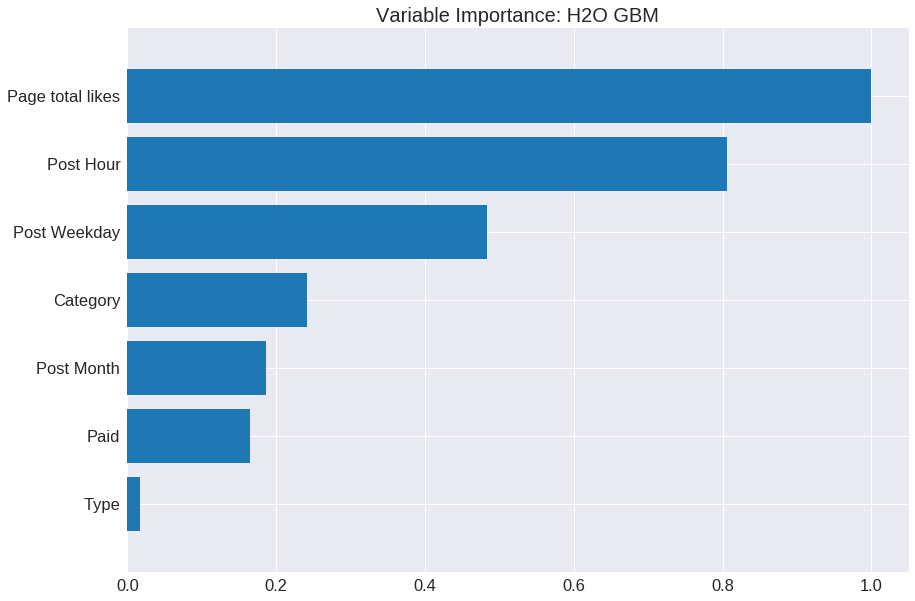

In [ ]:
m.varimp_plot()